In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from evalutation.plotting.plotting import PLOTTER
from data_prep.data_preparation import DATA_PREP
from data_loader.lfp_loader import LFP_LOADER

Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306


In [2]:
pltr = PLOTTER()

<Figure size 774x270 with 0 Axes>

In [3]:
b = 1
c = (10,1)
splits = [1,2,3,4,5]
csc = "5-40"
#csc = "57-80"


path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
#path_sklearn = "../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_25-14_18_11/"
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]#, 0.01, 0.1, 1.0]
w_L1 = [0.0, 0.1]

#channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 14, 14, 14, 14, 16, 16, 36, 36, 40]
channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 16, 16, 36, 36, 40]
#channels = [57, 57, 57, 58, 58, 58, 59, 60, 61, 61, 61, 63, 63, 64, 79, 79, 79, 80, 80, 80]
#units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 38, 39, 40, 41, 44, 45, 69, 70, 83]
units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83]
#units = [96, 97, 98, 101, 102, 103, 107, 112, 116, 117, 118, 125, 126, 129, 142, 143, 144, 150, 151, 152]
n_channels = len(channels)
n_splits = len(splits)
n_units = len(units)

In [4]:
#np.array(trial_df["losses"].values.tolist()).flatten()
#np.repeat(np.array(splits), n_channels)
#channels * 2
L1_trial_df = pd.read_pickle(path+f"CV_a{0.0}_L11.0.csv")

In [5]:
L1_trial_df.head()

,costs,theta,losses,preds
0,2.144422e+10,"[[-5.823059644516378, 0.1512515962583794, -0.0...","[0.020311944091457274, 0.00791146574939462, 0....","[0.020915220424347757, 0.009676703227615761, 0..."
1,2.144422e+10,"[[-5.792326624426947, 0.15495178611269966, -0....","[0.020802846228766037, 0.008425535516517845, 0...","[0.01937322195909879, 0.006559107654795487, 0...."
2,2.144422e+10,"[[-5.780242545812461, 0.30297980079719117, -0....","[0.021061227332180445, 0.008952541435131566, 0...","[0.020186028566110157, 0.008292185653367281, 0..."
3,2.144422e+10,"[[-5.819964144214562, 0.15474525451447876, -0....","[0.020383333263352517, 0.008147923502866444, 0...","[0.02148947868675809, 0.009151762096327358, 0...."
4,2.144422e+10,"[[-5.833679063426343, 0.18561322520218032, -0....","[0.02014791118478872, 0.008063738898433622, 0....","[0.020823311745241064, 0.008190261186473716, 0..."


In [6]:
trials = []
for a in alphas: 
    L1_trial_df = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    #trial_df["alpha"] = a
    #trial_df["split"] = np.arange(0,len(trial_df), 1)
    L1_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L1_trial_df["losses"].values.tolist()).flatten(), 
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L1"
    })
    
    L2_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L2_trial_df["losses"].values.tolist()).flatten(), 
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L2"
    })
    
    trial_exp_df = pd.concat([L1_trial_exp_df, L2_trial_exp_df], ignore_index=True)
    
    trials.append(trial_exp_df)

exp_df = pd.concat(trials, ignore_index=True)
exp_df.head()

,losses [NLL],splits,unit,alpha,regularization
0,0.020312,1,8,0.0,L1
1,0.007911,1,9,0.0,L1
2,0.001621,1,10,0.0,L1
3,0.002373,1,12,0.0,L1
4,0.001565,1,17,0.0,L1


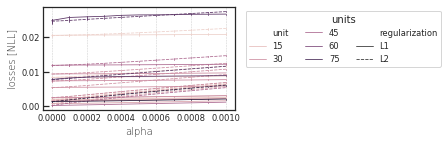

In [8]:
fig3 = pltr.plot_reg_losses_line(exp_df)
#fig3.set(xscale='log')

plt.subplots_adjust(
    left=0.12, right=0.5, top=0.97, bottom=0.25
)
fig3.savefig('plots/plot3.png')
fig3.savefig('plots/plot3.pdf')

In [70]:
trials = []
for a in alphas: 
    trial_df = pd.read_pickle(path+f"CV_a{a}.csv")
    trial_df["alpha"] = a
    trial_df["split"] = np.arange(0,len(trial_df), 1)
    trials.append(trial_df)

exp_df = pd.concat(trials, ignore_index=True)
exp_df.head()

,costs,theta,losses,preds,alpha,unit
0,19014.202643,"[[-2.823703492206324, -0.11091406751802795, -0...","[280995.3272639291, 133430.9171646988, 41595.7...","[56612.609538446646, 20125.433002724592, 7589....",0.000,0
1,19014.202643,"[[-2.772587619543808, -0.1449638732914278, -0....","[291638.54179049237, 125511.22064349893, 42505...","[54218.44465074336, 25964.232027954182, 5764.3...",0.000,1
2,19013.090512,"[[-2.8234750743073804, -0.09003199309627845, -...","[281003.33875034656, 133431.29574211728, 41595...","[56612.88896226455, 20126.771555529176, 7588.3...",0.001,0
3,19013.090512,"[[-2.7721119320748877, -0.07606506493613077, -...","[291663.25967251393, 125514.13771406046, 42513...","[54221.36969810581, 25958.743169656147, 5761.3...",0.001,1
4,19011.210756,"[[-2.820278964335769, -0.04322609312049462, -0...","[281082.335181402, 133434.3359342664, 41608.35...","[56625.715185760324, 20134.5683387162, 7581.57...",0.010,0


In [61]:
exp_df["losses"] = exp_df["losses"].apply(lambda x : np.array(x))
exp_df["final loss"] = exp_df["losses"].apply(lambda x : x[-1])
exp_df["theta"] = exp_df["theta"].apply(lambda x : np.array(x))
exp_df["preds"] = exp_df["preds"].apply(lambda x : np.array(x))
exp_df.head()

,costs,theta,losses,preds,alpha,unit,final loss
0,19790.061547,"[[-2.823703492206324, -0.11091406751802795, -0...","[280995.3272639291, 133430.9171646988, 41595.7...","[56612.609538446646, 20125.433002724592, 7589....",0.0,0,26567.793264
1,19790.061547,"[[-2.796118139403444, -0.08570071601643611, -0...","[287051.8991317541, 132789.01163885256, 42810....","[53783.42388356427, 24791.78766399046, 7867.63...",0.0,1,26936.074282
2,19790.061547,"[[-2.772587619543808, -0.1449638732914278, -0....","[291638.54179049237, 125511.22064349893, 42505...","[54218.44465074336, 25964.232027954182, 5764.3...",0.0,2,27844.132636
3,19790.061547,"[[-2.7995927039913484, -0.19313931078202645, -...","[286674.7468404896, 127652.08169039477, 42015....","[55211.30861258162, 24664.837748954607, 8197.4...",0.0,3,29297.711365
4,19790.061547,"[[-2.820496035460132, -0.14850344583372369, -0...","[281872.8146599587, 127776.85533553091, 39768....","[56786.571585433165, 28134.830248176688, 8949....",0.0,4,27598.044411


In [64]:
exp_df["theta"][0]

array([[-2.82370349e+00, -1.10914068e-01, -6.51127698e-02,
        -2.95896982e-02, -5.67525608e-03,  8.08441416e-03,
         1.29026548e-02,  1.41891546e-02,  1.23345769e-02,
         1.15825801e-02,  6.99986052e-03,  6.73735734e-03,
         1.05389439e-02,  8.46707264e-03,  6.37889894e-03,
         2.32428511e-03, -8.37418462e-04, -1.23490491e-03,
         4.53555633e-03,  1.45426219e-02,  2.37669591e-02,
         3.00896292e-02,  2.61672176e-02,  1.15626130e-02,
        -1.24315411e-02, -3.82568623e-02, -5.48459060e-02,
        -5.06242048e-02, -4.56282135e-03,  8.59402774e-02,
         2.30309841e-01],
       [-3.82837686e+00,  7.06178000e-04,  3.87427892e-03,
         6.45976514e-03,  7.98554034e-03,  8.25346596e-03,
         7.81635316e-03,  6.94623739e-03,  5.87816382e-03,
         5.22223412e-03,  4.18482069e-03,  3.82242836e-03,
         4.88327184e-03,  6.09628413e-03,  5.56500459e-03,
         5.24775311e-03,  5.26738067e-03,  5.34226325e-03,
         5.93935525e-03,  8.04

<AxesSubplot:xlabel='alpha', ylabel='final loss'>

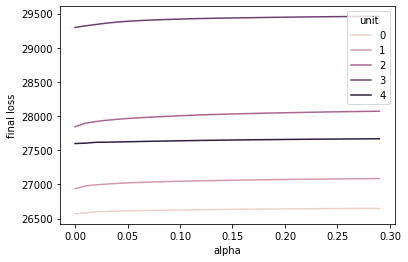

In [62]:
sns.lineplot(x="alpha", y="final loss", data=exp_df, hue="unit")